In [1]:
# 필요 데이터 불러오기 및 출력하기
# 전체로 보기 위해서 print 사용
import pandas as pd

co2 = pd.read_csv('../result/CO2.csv')
no = pd.read_csv('../result/NO.csv')
ch4 = pd.read_csv('../result/CH4.csv')
Antartica_mass = pd.read_csv('../result/Antartica_mass.csv')
temperature = pd.read_csv('../result/surface-temper.csv')
print(Antartica_mass)
print(temperature)

    Year      ice_mass
0   2002    -21.324747
1   2003  -1279.794133
2   2004  -3051.890000
3   2005  -2652.560000
4   2006  -1466.810000
5   2007  -3703.260000
6   2008  -6949.170000
7   2009  -6667.040000
8   2010 -10004.980000
9   2011 -11559.231515
10  2012 -12234.639880
11  2013 -14811.794809
12  2014 -18959.604960
13  2015 -20542.374138
14  2016 -22314.250669
15  2017 -21230.432217
16  2018 -26172.807440
17  2019 -27026.760000
18  2020 -30222.060000
19  2021 -31953.360000
     Year  temperature  lowess
0    1880        -0.17   -0.10
1    1881        -0.09   -0.13
2    1882        -0.11   -0.17
3    1883        -0.18   -0.20
4    1884        -0.28   -0.24
..    ...          ...     ...
137  2017         0.92    0.91
138  2018         0.85    0.92
139  2019         0.98    0.93
140  2020         1.02    0.93
141  2021         0.84    0.94

[142 rows x 3 columns]


In [2]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np


#평활화는 우리가 사용할 data가 아니니 제외시키기
# temperature.drop(columns=['lowess'], inplace=True)
temperature.drop(columns=['temperature'], inplace=True)

# 연도 통일해서 맞추고 index도 맞춰주기
temperature_result = temperature.loc[temperature.Year>=1990, :]
temperature_result.reset_index(drop=True, inplace=True)

co2_result = co2.loc[co2.Year >= 1990, :]
co2_result.reset_index(drop=True, inplace=True)

# co2, ch4, 데이터 연도 기준으로 합치기

data = pd.merge(co2_result, no, on='Year')
data = pd.merge(data, ch4, on='Year')

# 마지막으로 종속 변수인 temperature_result 합치기
data = pd.merge(data, temperature_result, on='Year')

# 독립변수, 종속변수 데이터 넣어주기
x = data[['CO2',  'NO', 'CH4']]
y = data['lowess'].values
# y = data['temperature'].values



In [3]:
total_list = []


In [4]:
# # 다항 비선형 회귀 사용해서 예측하기
# poly_features = PolynomialFeatures(degree=2, include_bias=False)
poly_features = PolynomialFeatures(degree=2)
x_poly = poly_features.fit_transform(x)

lin_reg_temperature = LinearRegression()
lin_reg_temperature.fit(x_poly, y)
# lin_reg_temperature.fit(x, y)

LinearRegression()

In [5]:
print(data.loc[data.Year >= 2003, :])

      Year           CO2            NO           CH4  lowess
13  2003.0  2.736672e+10  2.604750e+09  7.262510e+09    0.58
14  2004.0  2.862753e+10  2.687850e+09  7.505180e+09    0.61
15  2005.0  2.960278e+10  2.701330e+09  7.556280e+09    0.62
16  2006.0  3.058353e+10  2.733120e+09  7.749950e+09    0.62
17  2007.0  3.149374e+10  2.802950e+09  7.729960e+09    0.63
18  2008.0  3.206944e+10  2.775360e+09  7.782220e+09    0.64
19  2009.0  3.160704e+10  2.769550e+09  7.812910e+09    0.64
20  2010.0  3.334330e+10  2.845370e+09  7.909880e+09    0.64
21  2011.0  3.446845e+10  2.914600e+09  8.050430e+09    0.66
22  2012.0  3.497408e+10  2.937790e+09  8.141110e+09    0.69
23  2013.0  3.528303e+10  2.918250e+09  8.109300e+09    0.74
24  2014.0  3.553444e+10  2.963010e+09  8.266810e+09    0.78
25  2015.0  3.549641e+10  2.995510e+09  8.315910e+09    0.83
26  2016.0  3.545246e+10  3.027260e+09  8.227180e+09    0.87
27  2017.0  3.592574e+10  3.087400e+09  8.333400e+09    0.91
28  2018.0  3.664614e+10

In [6]:
from sklearn.linear_model import LinearRegression


# 데이터 2002년도 이후로만 있어서 이 값들 통일하기
# co2 = co2.loc[co2.Year >= 2003,:]
# no = no.loc[no.Year >= 2003, :]
# ch4 = ch4.loc[ch4.Year >= 2003, :]

# co2.reset_index(drop=True, inplace=True)
# no.reset_index(drop=True, inplace=True)
# ch4.reset_index(drop=True, inplace=True)
data = data.loc[data.Year >= 2003, :]
data.reset_index(drop=True, inplace=True)

# 데이터 합치기
# data = pd.merge(co2, no, on='Year')
# data = pd.merge(data, ch4, on='Year')
data = pd.merge(data, Antartica_mass, on='Year')

# 데이터 X,Y 두기
# x = data[['CO2', 'NO', 'CH4']]
x = data[['lowess']]
y = data['ice_mass'].values


# 선형회귀
lin_reg_ice = LinearRegression()
# lin_reg_ice.fit(x_poly, y)
lin_reg_ice.fit(x, y)

LinearRegression()

      Year           CO2            NO           CH4
0   2020.0  3.179837e+10  3.124815e+09  8.536440e+09
1   2021.0  3.216606e+10  3.152652e+09  8.598050e+09
2   2022.0  3.253571e+10  3.180490e+09  8.659659e+09
3   2023.0  3.290734e+10  3.208328e+09  8.721268e+09
4   2024.0  3.328093e+10  3.236165e+09  8.782878e+09
5   2025.0  3.365649e+10  3.264003e+09  8.844487e+09
6   2026.0  3.403402e+10  3.291841e+09  8.906097e+09
7   2027.0  3.441352e+10  3.319678e+09  8.967706e+09
8   2028.0  3.479498e+10  3.347516e+09  9.029315e+09
9   2029.0  3.517841e+10  3.375354e+09  9.090925e+09
10  2030.0  3.556382e+10  3.403192e+09  9.152534e+09
      Year           CO2            NO           CH4  Temperature
0   2020.0  3.179837e+10  3.124815e+09  8.536440e+09     0.896894
1   2021.0  3.216606e+10  3.152652e+09  8.598050e+09     0.925940
2   2022.0  3.253571e+10  3.180490e+09  8.659659e+09     0.955577
3   2023.0  3.290734e+10  3.208328e+09  8.721268e+09     0.985804
4   2024.0  3.328093e+10  3.236165

<AxesSubplot:>

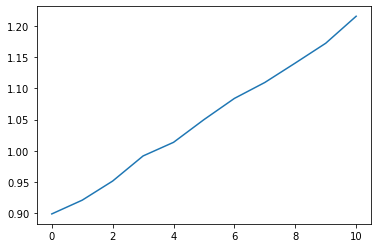

In [7]:
# 2050까지의 데이터 들고오기 
co2_2050 = pd.read_csv('../result/2030/co2_2030.csv')
CH4_2050 = pd.read_csv('../result/2030/CH4_2030.csv')
NO_2050 = pd.read_csv('../result/2030/NO_2030.csv')


co2_2050 = co2_2050.loc[co2_2050.Year >= 2020, :]
co2_2050.reset_index(drop=True, inplace=True)
CH4_2050 = CH4_2050.loc[CH4_2050.Year >= 2020, :]
CH4_2050.reset_index(drop=True, inplace=True)
NO_2050 = NO_2050.loc[NO_2050.Year >= 2020, :]
NO_2050.reset_index(drop=True, inplace=True)

data_2050 = pd.merge(co2_2050, NO_2050, on='Year')
data_2050 = pd.merge(data_2050, CH4_2050, on='Year')
# data_2050.loc[len(data_2050)] = [2031, 3.179837e+8, 3.403192e+09, 9.152534e+09]
print(data_2050)

x_future_data = data_2050[['CO2', 'NO', 'CH4']]
x_future_data_poly = poly_features.fit_transform(x_future_data)
result_2050 = list(lin_reg_temperature.predict(x_future_data_poly))
data_2050['Temperature'] = result_2050
print(data_2050)

x_future_data_ice = data_2050[['Temperature']]
result_2030 = list(lin_reg_ice.predict(x_future_data_ice))
data_2050['ice_mass'] = result_2030

for i in range(len(data_2050)):
    if i % 10 == 1:
        data_2050.loc[i, 'Temperature'] = data_2050.loc[i, 'Temperature'] - 0.005
    elif i % 10 == 2:
        data_2050.loc[i, 'Temperature'] = data_2050.loc[i, 'Temperature'] - 0.004
        
    elif i% 10 == 3:
        data_2050.loc[i, 'Temperature'] = data_2050.loc[i, 'Temperature'] + 0.006
        
    elif i% 10 == 4:
        data_2050.loc[i, 'Temperature'] = data_2050.loc[i, 'Temperature'] - 0.003
        
    elif i% 10 == 5:
        data_2050.loc[i, 'Temperature'] = data_2050.loc[i, 'Temperature'] + 0.002
        
    elif i% 10 == 6:
        data_2050.loc[i, 'Temperature'] = data_2050.loc[i, 'Temperature'] + 0.004
        
    elif i% 10 == 7:
        data_2050.loc[i, 'Temperature'] = data_2050.loc[i, 'Temperature'] - 0.003
        
    elif i% 10 == 8:
        data_2050.loc[i, 'Temperature'] = data_2050.loc[i, 'Temperature'] - 0.005
       
    elif i% 10 == 9:
        data_2050.loc[i, 'Temperature'] = data_2050.loc[i, 'Temperature'] - 0.007
       
    else:
        data_2050.loc[i, 'Temperature'] = data_2050.loc[i, 'Temperature'] + 0.002
print(data_2050)
       
data_2050.loc[:,'Temperature'].plot()

In [8]:
# # 2050까지의 데이터 들고오기 
# co2_2050 = pd.read_csv('../result/2030/co2_2030.csv')
# CH4_2050 = pd.read_csv('../result/2030/CH4_2030.csv')
# NO_2050 = pd.read_csv('../result/2030/NO_2030.csv')

# # 데이터 통일하기
# co2_2050 = co2_2050.loc[co2_2050.Year >= 2020, :]
# co2_2050.reset_index(drop=True, inplace=True)
# CH4_2050 = CH4_2050.loc[CH4_2050.Year >= 2020, :]
# CH4_2050.reset_index(drop=True, inplace=True)
# NO_2050 = NO_2050.loc[NO_2050.Year >= 2020, :]
# NO_2050.reset_index(drop=True, inplace=True)

# data_2050 = pd.merge(co2_2050, NO_2050, on='Year')
# data_2050 = pd.merge(data_2050, CH4_2050, on='Year')
# x_future_data = data_2050[[  'CH4', 'NO', 'CO2']]




for i in range(len(data_2050)):
    if i % 10 == 1:
#         data_2030.loc[i, 'ice_mass'] = data_2030.loc[i, 'ice_mass'] - 1500
        data_2050.loc[i, 'ice_mass'] = data_2050.loc[i, 'ice_mass'] - 375
    elif i% 10 == 2:
#         data_2030.loc[i, 'ice_mass'] = data_2030.loc[i, 'ice_mass'] + 3000
        data_2050.loc[i, 'ice_mass'] = data_2050.loc[i, 'ice_mass'] + 750
    elif i% 10 == 3:
#         data_2030.loc[i, 'ice_mass'] = data_2030.loc[i, 'ice_mass'] - 2000
        data_2050.loc[i, 'ice_mass'] = data_2050.loc[i, 'ice_mass'] - 500
    elif i% 10 == 4:
#         data_2030.loc[i, 'ice_mass'] = data_2030.loc[i, 'ice_mass'] + 1000
        data_2050.loc[i, 'ice_mass'] = data_2050.loc[i, 'ice_mass'] + 250
    elif i% 10 == 5:
#         data_2030.loc[i, 'ice_mass'] = data_2030.loc[i, 'ice_mass'] + 1500
        data_2050.loc[i, 'ice_mass'] = data_2050.loc[i, 'ice_mass'] + 375
    elif i% 10 == 6:
#         data_2030.loc[i, 'ice_mass'] = data_2030.loc[i, 'ice_mass'] - 2000
        data_2050.loc[i, 'ice_mass'] = data_2050.loc[i, 'ice_mass'] - 500
    elif i% 10 == 7:
#         data_2030.loc[i, 'ice_mass'] = data_2030.loc[i, 'ice_mass'] - 3000
        data_2050.loc[i, 'ice_mass'] = data_2050.loc[i, 'ice_mass'] - 750
    elif i% 10 == 8:
#         data_2030.loc[i, 'ice_mass'] = data_2030.loc[i, 'ice_mass'] + 1500
        data_2050.loc[i, 'ice_mass'] = data_2050.loc[i, 'ice_mass'] + 375
    elif i % 10 == 9:
#         data_2030.loc[i, 'ice_mass'] = data_2030.loc[i, 'ice_mass'] - 800
        data_2050.loc[i, 'ice_mass'] = data_2050.loc[i, 'ice_mass'] - 200
    else:
#         data_2030.loc[i, 'ice_mass'] = data_2030.loc[i, 'ice_mass'] + 1000
        data_2050.loc[i, 'ice_mass'] = data_2050.loc[i, 'ice_mass'] + 250
3
print(data_2050)

      Year           CO2            NO           CH4  Temperature  \
0   2020.0  3.179837e+10  3.124815e+09  8.536440e+09     0.898894   
1   2021.0  3.216606e+10  3.152652e+09  8.598050e+09     0.920940   
2   2022.0  3.253571e+10  3.180490e+09  8.659659e+09     0.951577   
3   2023.0  3.290734e+10  3.208328e+09  8.721268e+09     0.991804   
4   2024.0  3.328093e+10  3.236165e+09  8.782878e+09     1.013618   
5   2025.0  3.365649e+10  3.264003e+09  8.844487e+09     1.050015   
6   2026.0  3.403402e+10  3.291841e+09  8.906097e+09     1.083994   
7   2027.0  3.441352e+10  3.319678e+09  8.967706e+09     1.109550   
8   2028.0  3.479498e+10  3.347516e+09  9.029315e+09     1.140681   
9   2029.0  3.517841e+10  3.375354e+09  9.090925e+09     1.172382   
10  2030.0  3.556382e+10  3.403192e+09  9.152534e+09     1.215651   

        ice_mass  
0  -25330.427732  
1  -28120.170221  
2  -29204.014495  
3  -32706.781154  
4  -34253.276225  
5  -36468.291162  
6  -39726.602842  
7  -42402.973570  


In [9]:
data_2050.to_csv("2020_2030_data.csv", index=False)

In [10]:
import joblib

joblib.dump(lin_reg_temperature, 'temperature_learning')

['temperature_learning']

In [11]:

joblib.dump(lin_reg_ice, 'ice_mass_learning')

['ice_mass_learning']